# Training a neural network on oneDNN

## Objective
The goal of this notebook is to walkthrough the procedure of training a simple neural network using oneDNN on GPU.


***
# Environment variables

The first step is to setup all the environment variable in order for the compiler to find all the necessary header files.


Set the installation path of your oneAPI toolkit

In [1]:
%env ONEAPI_INSTALL=/opt/intel/oneapi

env: ONEAPI_INSTALL=/opt/intel/oneapi


In [2]:
import os
if os.path.isdir(os.environ['ONEAPI_INSTALL']) == False:
    print("ERROR! wrong oneAPI installation path")

# Build and Run with oneAPI DPC++ Compiler 
one of the oneDNN configurations supports oneAPI DPC++ compiler, and it can run on different architectures by using DPC++.
The following section shows you how to build with DPC++ and run on different architectures.

#### Script - build.sh
The script **build.sh** encapsulates the compiler **dpcpp** command and flags that will generate the exectuable.
In order to use DPC++ compiler and related SYCL runtime, some definitions must be passed as cmake arguments.
Here are related cmake arguments for DPC++ configuration : 

   -DCMAKE_C_COMPILER=clang -DCMAKE_CXX_COMPILER=dpcpp -DDNNL_CPU_RUNTIME=SYCL -DDNNL_GPU_RUNTIME=SYCL

In [3]:
%%writefile build.sh
#!/bin/bash
source $ONEAPI_INSTALL/setvars.sh --force> /dev/null 2>&1
export EXAMPLE_ROOT=./src/
mkdir dpcpp
cd dpcpp
cmake ../src -DCMAKE_C_COMPILER=clang -DCMAKE_CXX_COMPILER=dpcpp -DDNNL_CPU_RUNTIME=SYCL -DDNNL_GPU_RUNTIME=SYCL
make onednn-training-cpp



Overwriting build.sh


Once you achieve an all-clear from your compilation, you execute your program on the DevCloud or a local machine.

#### Script - run.sh
the script **run.sh** encapsulates the program for submission to the job queue for execution.
By default, the built program uses CPU as the execution engine, but the user can switch to GPU by giving an input argument "gpu".
The user can refer run.sh below to run on GPU.
To run on CPU, simply remove the input argument "gpu" .

In [4]:
%%writefile run.sh
#!/bin/bash
source $ONEAPI_INSTALL/setvars.sh --force > /dev/null 2>&1
echo "########## Executing the run"
./dpcpp/onednn-training-cpp gpu
echo "########## Done with the run"


Overwriting run.sh



#### Submitting **build.sh** and **run.sh** to the job queue
Now we can submit the **build.sh** and **run.sh** to the job queue.
##### NOTE - it is possible to execute any of the build and run commands in local environments.
To enable users to run their scripts both on the Intel DevCloud or in local environments, this and subsequent training checks for the existence of the job submission command **qsub**.  If the check fails, it is assumed that build/run will be local.

In [19]:
! rm -rf dpcpp;chmod 755 q; chmod 755 build.sh; chmod 755 run.sh;if [ -x "$(command -v qsub)" ]; then ./q build.sh; ./q run.sh; else ./build.sh; ./run.sh; fi

Submitting job:
832687.v-qsvr-1.aidevcloud
Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
832687.v-qsvr-1            build.sh         u64761                 0 Q batch          
Waiting for Output........................................
########################################################################
#      Date:           Sun 18 Apr 2021 02:00:05 PM PDT
#    Job ID:           832687.v-qsvr-1.aidevcloud
#      User:           u64761
# Resources:           neednodes=1:gpu:ppn=2,nodes=1:gpu:ppn=2,walltime=06:00:00
########################################################################

 
:: initializing oneAPI environment ...
   832687.v-qsvr-1.aidevcloud.SC: BASH_VERSION = 5.0.17(1)-release
:: advisor -- latest
:: ccl -- latest
:: clck -- latest
:: compiler -- latest
:: dal -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: dnnl -- latest
:: dpcpp-ct -- latest
:: d

(50,)


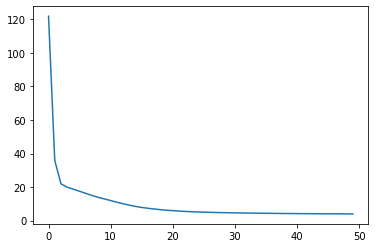

In [6]:
import matplotlib.pyplot as plt
import numpy as np

size = 500
step = 10
iteration = np.load("data/losses/iteration_0.npy")

# iterations = np.zeros([len(range(10,360,10)), iteration.shape[0]])

iterations = np.zeros([len(range(0,size,step)), iteration.shape[0]])

for count, iteration_number in enumerate(range(0,size,step)):
    #print(iteration_number)
    iterations[count, :] = np.load("data/losses/iteration_" + str(iteration_number) + ".npy")

iterations.shape

loss = np.sum(iterations**2, axis=1)
print(loss.shape)
plt.plot(np.arange(0,int(size/step)), loss[0:int(size/step)])

(50,)


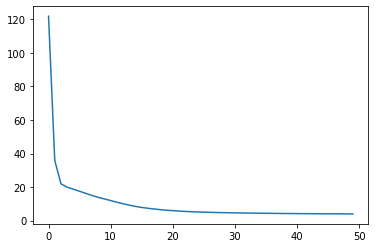

In [8]:
import matplotlib.pyplot as plt
import numpy as np

loss = np.load("data/losses/loss_history.npy")

print(loss.shape)
plt.plot(np.arange(0,len(loss)), loss)

In [9]:
print(loss)

[121.93675    35.875015   21.86829    19.914583   18.678598   17.442629
  16.19152    14.923239   13.832113   12.88909    11.898237   10.9198885
  10.01802     9.159383    8.400176    7.800344    7.3016567   6.8612795
   6.4780884   6.1513677   5.877782    5.622965    5.4117193   5.2458587
   5.1046143   4.984711    4.8804393   4.785885    4.700943    4.627899
   4.564381    4.5065837   4.4518437   4.400242    4.351791    4.3066974
   4.2653017   4.2267013   4.1909924   4.1577787   4.126733    4.097625
   4.070347    4.044816    4.021003    4.0016513   3.983754    3.9668453
   3.9511592   3.9362917]
